# What is underfitting and overfitting?

# What is underfitting? 

Underfitting is a scenario in data science where a data model is unable to capture the relationship between the input and output variables accurately, generating a high error rate on both the training set and unseen data.


underfitting means the model is not learning the value properly

# What is overfitting?


When the model memorizes the noise and fits too closely to the training set, the model becomes “overfitted,” and it is unable to generalize well to new data. If a model cannot generalize well to new data, then it will not be able to perform the classification or prediction tasks that it was intended for.



underfitting situtaion comes when the model is learning entire values, it is not able to differentiate between different different classification

# Regularization

# L1,L2 :: Regularization

L1 : Lasso Regression

L2 : Rigde Regression

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error,mean_absolute_error

from sklearn.datasets import load_boston

import warnings
warnings.simplefilter("ignore")


In [7]:
from sklearn.linear_model import Lasso,Ridge

In [8]:
boston = load_boston()

In [9]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [10]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [11]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [12]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [13]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [15]:
x=boston.data

In [17]:
y=boston.target

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=47)

In [20]:
x_train.shape

(339, 13)

In [21]:
x_test.shape

(167, 13)

In [22]:
y_train.shape

(339,)

In [23]:
y_test.shape

(167,)

In [24]:
lm=LinearRegression()

In [25]:
lm

LinearRegression()

In [26]:
lm.fit(x_train,y_train)

LinearRegression()

In [27]:
lm.predict(x_test)

array([15.84192559, 32.20569827, 24.42230605, 30.84928633, 27.31927564,
       19.65311852, 23.05432432, 31.7229619 , 32.45933432, 22.63205367,
       24.91948411, 27.15339443, 20.16729816, 27.95837435, 32.02171343,
       10.19889234, 36.05901216, 14.96179519, 11.66767994, 15.55657875,
       35.22194463, 22.20185653, 38.8142947 , 20.4290284 , 28.49163796,
       19.08044635, 24.02797912, 20.78907881, 19.65030776, 26.41697272,
       14.14117934, 25.89121978, 17.77544803,  8.02793933, 32.83228276,
       19.02926719, 12.35104367, 27.13926668, 22.64549403, 18.75190375,
       23.67614267, 25.19654715, 37.31343761, 21.2740326 , 32.30876439,
       20.32537386,  7.41789113, 28.06144027, 36.28142462, 21.53339694,
       28.92419026, 23.82647841,  7.34739041, 24.23067937,  6.12843722,
       21.90316166, 18.29285279, 13.19056989,  5.99004693, 30.08061674,
       12.37541899, 17.83046748, 18.15297944, 19.08005857, 42.19993227,
       22.50076808, 20.52857282, 23.9328331 , 25.64429237, 27.51

In [28]:
lm.score(x_train,y_train)

0.7665529829880267

In [29]:
lm.coef_

array([-1.10843155e-01,  3.66995321e-02,  8.74460015e-03,  3.32218225e+00,
       -1.71846638e+01,  4.81511727e+00, -1.38022222e-02, -1.44146494e+00,
        2.63392383e-01, -1.17496784e-02, -9.25130518e-01,  9.07087108e-03,
       -4.12146398e-01])

In [30]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

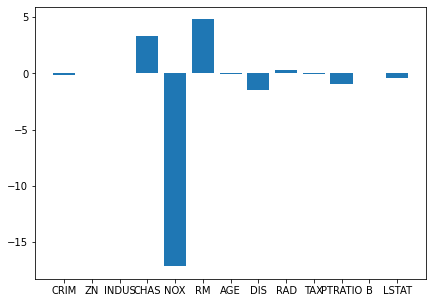

In [31]:
plt.figure(figsize=(7,5))
plt.bar(boston.feature_names,lm.coef_)
plt.show()

In [32]:
bos=pd.DataFrame(boston.data)

In [33]:
bos

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [34]:
bos.columns=boston.feature_names

In [35]:
bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [36]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [38]:
bos['B']

0      396.90
1      396.90
2      392.83
3      394.63
4      396.90
        ...  
501    391.99
502    396.90
503    396.90
504    393.45
505    396.90
Name: B, Length: 506, dtype: float64

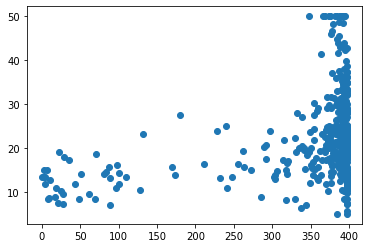

In [39]:
plt.scatter(bos['B'],y)
plt.show()

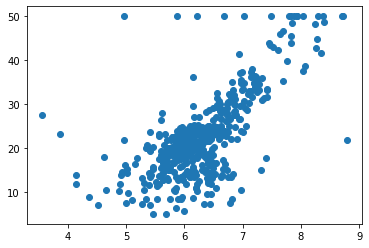

In [40]:
plt.scatter(bos['RM'],y)
plt.show()

In [41]:
lm.coef_

array([-1.10843155e-01,  3.66995321e-02,  8.74460015e-03,  3.32218225e+00,
       -1.71846638e+01,  4.81511727e+00, -1.38022222e-02, -1.44146494e+00,
        2.63392383e-01, -1.17496784e-02, -9.25130518e-01,  9.07087108e-03,
       -4.12146398e-01])

In [42]:
# predict the value

pred=lm.predict(x_test)
print('predicted value',pred)
print('actual value',y_test)

predicted value [15.84192559 32.20569827 24.42230605 30.84928633 27.31927564 19.65311852
 23.05432432 31.7229619  32.45933432 22.63205367 24.91948411 27.15339443
 20.16729816 27.95837435 32.02171343 10.19889234 36.05901216 14.96179519
 11.66767994 15.55657875 35.22194463 22.20185653 38.8142947  20.4290284
 28.49163796 19.08044635 24.02797912 20.78907881 19.65030776 26.41697272
 14.14117934 25.89121978 17.77544803  8.02793933 32.83228276 19.02926719
 12.35104367 27.13926668 22.64549403 18.75190375 23.67614267 25.19654715
 37.31343761 21.2740326  32.30876439 20.32537386  7.41789113 28.06144027
 36.28142462 21.53339694 28.92419026 23.82647841  7.34739041 24.23067937
  6.12843722 21.90316166 18.29285279 13.19056989  5.99004693 30.08061674
 12.37541899 17.83046748 18.15297944 19.08005857 42.19993227 22.50076808
 20.52857282 23.9328331  25.64429237 27.51546185 29.74089548 19.64560651
 24.62720513 22.8048752  30.94928878 13.76556158 17.76806882 20.21873241
 16.61941218 17.13960152  2.4308014 

In [43]:
print('error:')
print(mean_squared_error(pred,y_test))

error:
27.42072820908458


In [44]:
print('error:')
print(mean_absolute_error(pred,y_test))

error:
3.2686346644974407


In [45]:
# will remove the cofficent to zero (those features are not informative).

# alpha values could be .....> .0001,.001,.01,.1,1,10------>higher values reduce all the cofficients towards 0 and impact output

# defult value of alpha -1.0

ls = Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.7665529400345414

In [49]:
ls.coef_

array([-1.10842268e-01,  3.66998800e-02,  8.73686616e-03,  3.32215005e+00,
       -1.71830063e+01,  4.81513570e+00, -1.38038984e-02, -1.44144307e+00,
        2.63388003e-01, -1.17498140e-02, -9.25109364e-01,  9.07099128e-03,
       -4.12146425e-01])

In [50]:
# try to minimize the coefficent value


rd = Ridge(alpha=0.0001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.7665529828886577

In [51]:
rd.coef_

array([-1.10842268e-01,  3.66998800e-02,  8.73686616e-03,  3.32215005e+00,
       -1.71830063e+01,  4.81513570e+00, -1.38038984e-02, -1.44144307e+00,
        2.63388003e-01, -1.17498140e-02, -9.25109364e-01,  9.07099128e-03,
       -4.12146425e-01])

In [52]:
from sklearn.linear_model import ElasticNet

In [53]:
enr=ElasticNet()
enr = Ridge(alpha=0.0001)
enr.fit(x_train,y_train)
enr.score(x_train,y_train)

0.7665529828886577

In [54]:
enr.coef_

array([-1.10842268e-01,  3.66998800e-02,  8.73686616e-03,  3.32215005e+00,
       -1.71830063e+01,  4.81513570e+00, -1.38038984e-02, -1.44144307e+00,
        2.63388003e-01, -1.17498140e-02, -9.25109364e-01,  9.07099128e-03,
       -4.12146425e-01])

In [55]:
print(enr.score(x_train,y_train))

0.7665529828886577


In [57]:
print(enr.fit(x_train,y_train))


print(enr.predict(x_test))

Ridge(alpha=0.0001)
[15.84211922 32.2056939  24.4221696  30.84932949 27.31928526 19.6531461
 23.05441357 31.72304852 32.45921057 22.63190149 24.91951875 27.15347376
 20.16721563 27.95821616 32.0215481  10.19893421 36.05893574 14.96181059
 11.66771946 15.556628   35.22187304 22.2017583  38.81428015 20.42894254
 28.49152776 19.080278   24.02791208 20.78917793 19.65039694 26.4169159
 14.1412056  25.89110826 17.77537226  8.02795735 32.83218976 19.02937818
 12.35108156 27.13931127 22.64547166 18.75201677 23.67623077 25.19654396
 37.31333915 21.27403038 32.30869664 20.32525422  7.41773302 28.06137375
 36.28148607 21.53356519 28.92409926 23.82645669  7.34744064 24.23070488
  6.12838151 21.90324382 18.29287053 13.19058784  5.99005295 30.08057693
 12.37547557 17.8303208  18.15291773 19.08008625 42.19988557 22.50072906
 20.52852657 23.93270279 25.64424952 27.51531387 29.74077844 19.64555312
 24.62720718 22.80468424 30.94926702 13.76543981 17.76806825 20.21864378
 16.61942239 17.13949647  2.43080

In [68]:
from sklearn.svm import SVR


In [79]:
svr=SVR(kernel='linear')

In [117]:
svr.fit(x_train,y_train)
pred_y=svr.predict(x_test)
print(pred_y)

print(svr.score(x_train,y_train))


[24.00158214 24.10045352 19.66149947 24.19404617 23.72980738 20.24763968
 14.61091303 22.33566489 20.59191098 17.11113942 22.91057398 24.05518997
 20.13829476 16.53744441 20.45649728 20.7721043  24.08171581 22.13160815
 14.66848569 21.7723086  23.51552213 22.03813213 22.31953398 15.29385808
 23.11254516 11.92956305 22.7901004  22.51422931 15.64439737 23.82160121
 21.38973085 23.49589931 17.24550088 14.38494334 22.18328784 22.59396353
 12.00305411 23.72493445 22.55171801 22.6861405  23.34405865 22.04368868
 20.6954235  22.71306661 21.98680468 15.06196744 12.01987116 22.1991777
 22.12669711 23.14067862 23.33066264 22.82755702 13.55270406 22.44739587
 14.28231881 22.41656449 22.30324191 14.86622536 13.94453568 23.41017995
 12.18923213 21.98804169 13.9467562  20.36404727 24.11157676 21.09607953
 23.22219219 22.2619002  23.54917029 20.3924084  22.05824529 19.65944781
 21.60494427 21.29641747 23.43778782 13.29483757 21.96176476 22.1428109
 20.24741517 13.94049789 13.07962959 24.31583206 23.9

In [99]:
svr=SVR(kernel='poly')

svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))
pred_y=svr.predict(x_test)

print(pred_y)

0.2198420503620132
[24.00158214 24.10045352 19.66149947 24.19404617 23.72980738 20.24763968
 14.61091303 22.33566489 20.59191098 17.11113942 22.91057398 24.05518997
 20.13829476 16.53744441 20.45649728 20.7721043  24.08171581 22.13160815
 14.66848569 21.7723086  23.51552213 22.03813213 22.31953398 15.29385808
 23.11254516 11.92956305 22.7901004  22.51422931 15.64439737 23.82160121
 21.38973085 23.49589931 17.24550088 14.38494334 22.18328784 22.59396353
 12.00305411 23.72493445 22.55171801 22.6861405  23.34405865 22.04368868
 20.6954235  22.71306661 21.98680468 15.06196744 12.01987116 22.1991777
 22.12669711 23.14067862 23.33066264 22.82755702 13.55270406 22.44739587
 14.28231881 22.41656449 22.30324191 14.86622536 13.94453568 23.41017995
 12.18923213 21.98804169 13.9467562  20.36404727 24.11157676 21.09607953
 23.22219219 22.2619002  23.54917029 20.3924084  22.05824529 19.65944781
 21.60494427 21.29641747 23.43778782 13.29483757 21.96176476 22.1428109
 20.24741517 13.94049789 13.079629

In [83]:
svr=SVR(kernel='rbf')
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))
pred_y=svr.predict(x_test)

0.2292499655454553


In [107]:
from sklearn.svm import SVR

In [108]:
kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))

0.7390429791158948
0.2198420503620132
0.2292499655454553


In [89]:
from sklearn.tree import DecisionTreeRegressor

In [115]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr_pred=dtr.predict(x_test)
print(dtr_pred)

dtr.score(x_train,y_train)

[18.6 31.1 21.5 27.9 23.7 22.3 15.  33.8 21.  21.2 24.7 28.6 20.4 50.
 23.1 19.1 34.6 18.5  7.2 14.8 31.1 19.5 50.  14.3 21.6 14.5 21.2 20.4
 17.1 22.3 13.9 23.4 10.2 10.5 30.1 19.6 14.3 25.3 20.3 19.6 25.  21.
 50.  21.6 33.8 14.5 14.5 21.  36.5 22.6 25.1 21.2  5.  23.2 13.8 17.5
 22.5 12.3 10.5 32.  23.2 20.  14.5 22.3 50.  22.3 24.7 28.1 25.  14.5
 21.7 18.4 26.5 21.2 32.  15.6 21.7 27.1 12.5 27.5 10.5 33.4 43.8 21.7
 37.3 13.3 24.8 21.  27.5 22.   9.6 20.4 14.5 20.2 29.  15.6 46.7 33.1
  8.4 20.6 26.6 17.3 21.9 15.6 19.4 31.1 18.3 19.1 13.4 19.5 13.9 23.2
 37.3 20.4 10.4 20.  23.8 19.8 46.7 19.4 12.3 16.1 28.5 21.2 10.8 18.9
 37.2  8.5 32.  17.1 17.5 10.4 19.4 22.4 12.5 33.1 27.5 19.3 19.3 13.4
 35.2 17.5  7.2 18.5 21.8 50.  17.6 15.1 25.  21.  23.4 50.  21.  11.8
 21.  18.4 50.  27.5 23.3 15.4 20.2 27.5 16.7 11.8 25.3 32.7 33.1]


1.0

In [131]:
r2_score(y_test,dtr_pred)


0.599389204962092

In [105]:
criterionlist=['squared_error','friedman_mse','absolute_error','poisson']
for i in criterionlist:
    dt=DecisionTreeRegressor(criterion=i)
    dt.fit(x_train,y_train)
    print(dt.score(x_train,y_train))

1.0
1.0
1.0
1.0


In [93]:
from sklearn.neighbors import KNeighborsRegressor

In [130]:
knr=KNeighborsRegressor(n_neighbors=5)
knr.fit(x_train,y_train)
knr_pred = knr.predict(x_test)
knr.score(x_train,y_train)

0.6533617076241991

In [118]:
from sklearn.metrics import r2_score

In [124]:
r2_score(y_test,knr_pred)

0.4834542430836335

In [133]:
mean_squared_error(y_test,knr_pred)

43.22964790419161

# Simple Imputer method:

#simple imputer work for imputing null values in object or categorical data or object data type

In [162]:
import csv
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [163]:
ds=pd.read_csv('empl.csv')

In [164]:
ds

,SNo,Name,Age,City,Country,Salary
0,1,Tom,28.0,Toronto,Canada,20000.0
1,2,Lee,31.0,Edmonto,Canada,3900.0
2,3,Dave,34.0,Toronto,Canada,8000.0
3,4,Anik,26.0,HongKong,Asia,66672.0
4,5,kamal,30.0,NaN,America,NaN
5,6,Geet,NaN,HongKong,Asia,30007.0
6,7,Steven,43.0,BayArea,America,8300.0
7,8,Ram,38.0,Hyderabad,Asia,54666.0
8,9,hari,50.0,newyork,America,67666.0
9,11,yami,NaN,newyork,America,8888.0


In [165]:
df=pd.DataFrame(data=ds)

In [166]:
df

,SNo,Name,Age,City,Country,Salary
0,1,Tom,28.0,Toronto,Canada,20000.0
1,2,Lee,31.0,Edmonto,Canada,3900.0
2,3,Dave,34.0,Toronto,Canada,8000.0
3,4,Anik,26.0,HongKong,Asia,66672.0
4,5,kamal,30.0,NaN,America,NaN
5,6,Geet,NaN,HongKong,Asia,30007.0
6,7,Steven,43.0,BayArea,America,8300.0
7,8,Ram,38.0,Hyderabad,Asia,54666.0
8,9,hari,50.0,newyork,America,67666.0
9,11,yami,NaN,newyork,America,8888.0


In [167]:
df.dtypes

SNo          int64
Name        object
Age        float64
City        object
Country     object
Salary     float64
dtype: object

In [168]:
df.describe()

,SNo,Age,Salary
count,22.000000,19.000000,19.000000
mean,12.090909,32.421053,33739.947368
std,6.927578,7.174924,23151.188084
min,1.000000,22.000000,3900.000000
25%,6.250000,27.000000,8888.000000
50%,12.500000,31.000000,33451.000000
75%,17.750000,36.000000,54666.000000
max,23.000000,50.000000,67666.000000


In [169]:
df.drop(['Name'],axis=1,inplace=True)

In [170]:
df

,SNo,Age,City,Country,Salary
0,1,28.0,Toronto,Canada,20000.0
1,2,31.0,Edmonto,Canada,3900.0
2,3,34.0,Toronto,Canada,8000.0
3,4,26.0,HongKong,Asia,66672.0
4,5,30.0,NaN,America,NaN
5,6,NaN,HongKong,Asia,30007.0
6,7,43.0,BayArea,America,8300.0
7,8,38.0,Hyderabad,Asia,54666.0
8,9,50.0,newyork,America,67666.0
9,11,NaN,newyork,America,8888.0


In [171]:
df.isnull().sum()

SNo        0
Age        3
City       3
Country    0
Salary     3
dtype: int64

<AxesSubplot:>

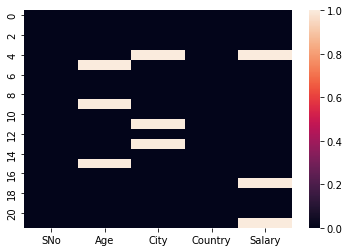

In [172]:
sns.heatmap(df.isnull())

In [173]:
from sklearn.impute import SimpleImputer

In [174]:
imp = SimpleImputer(strategy='most_frequent')
df['City']=imp.fit_transform(df['City'].values.reshape(-1,1))
df

,SNo,Age,City,Country,Salary
0,1,28.0,Toronto,Canada,20000.0
1,2,31.0,Edmonto,Canada,3900.0
2,3,34.0,Toronto,Canada,8000.0
3,4,26.0,HongKong,Asia,66672.0
4,5,30.0,HongKong,America,NaN
5,6,NaN,HongKong,Asia,30007.0
6,7,43.0,BayArea,America,8300.0
7,8,38.0,Hyderabad,Asia,54666.0
8,9,50.0,newyork,America,67666.0
9,11,NaN,newyork,America,8888.0


In [175]:
df.isnull().sum()

SNo        0
Age        3
City       0
Country    0
Salary     3
dtype: int64

In [176]:
imp = SimpleImputer(strategy='mean')
df['Age']=imp.fit_transform(df['Age'].values.reshape(-1,1))
df['Salary']=imp.fit_transform(df['Salary'].values.reshape(-1,1))

In [177]:
df.isnull().sum()

SNo        0
Age        0
City       0
Country    0
Salary     0
dtype: int64

# Encoding the data string to numeric

There are two types of Encoding method

1. Label Encoder - it is used for >2 values, exmaple - rainy,summer,winter

2. One Hot Encoder - it is used for binary data, example-male.female

In [178]:
le=LabelEncoder()

In [181]:
df['City']=le.fit_transform(df['City'].values.reshape(-1,1))
df['Country']=le.fit_transform(df['Country'].values.reshape(-1,1))

In [182]:
df

,SNo,Age,City,Country,Salary
0,1,28.000000,8,3,20000.000000
1,2,31.000000,3,3,3900.000000
2,3,34.000000,8,3,8000.000000
3,4,26.000000,5,2,66672.000000
4,5,30.000000,5,1,33739.947368
5,6,32.421053,5,2,30007.000000
6,7,43.000000,1,1,8300.000000
7,8,38.000000,6,2,54666.000000
8,9,50.000000,9,1,67666.000000
9,11,32.421053,9,1,8888.000000


In [184]:
#2nd method
#le=labelEncoder()

#list1=['City','Contry']

#for val in list1:
    #df(val)=le.fit_trainform(df[val].astype(str))
    
    #df

# One Hot Encoder:

In [186]:
import sklearn

from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [187]:
ds=pd.read_csv('age_salary.csv')

In [188]:
ds

,index,Nation,purchased_item,salary,age
0,0,India,No,66777.0,23.0
1,1,Russia,Yes,87878.0,24.0
2,2,Germany,No,34559.0,NaN
3,3,India,Yes,40000.0,26.0
4,4,Germany,Yes,NaN,21.0
5,5,Russia,No,45000.0,NaN
6,6,Germany,Yes,89993.0,62.0
7,7,India,No,55555.0,24.0
8,8,Russia,Yes,NaN,45.0
9,9,Germany,Yes,67222.0,53.0


In [191]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           10 non-null     int64  
 1   Nation          10 non-null     object 
 2   purchased_item  10 non-null     object 
 3   salary          8 non-null      float64
 4   age             8 non-null      float64
dtypes: float64(2), int64(1), object(2)
memory usage: 528.0+ bytes


In [192]:
ds.isnull().sum()

index             0
Nation            0
purchased_item    0
salary            2
age               2
dtype: int64

<AxesSubplot:>

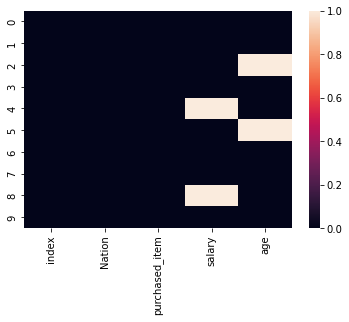

In [193]:
sns.heatmap(ds.isnull())

In [199]:
imp = SimpleImputer(strategy='mean')
ds['age']=imp.fit_transform(ds['age'].values.reshape(-1,1))
ds['salary']=imp.fit_transform(ds['salary'].values.reshape(-1,1))

In [200]:
ds

,index,Nation,purchased_item,salary,age
0,0,India,No,66777.0,23.00
1,1,Russia,Yes,87878.0,24.00
2,2,Germany,No,34559.0,34.75
3,3,India,Yes,40000.0,26.00
4,4,Germany,Yes,60873.0,21.00
5,5,Russia,No,45000.0,34.75
6,6,Germany,Yes,89993.0,62.00
7,7,India,No,55555.0,24.00
8,8,Russia,Yes,60873.0,45.00
9,9,Germany,Yes,67222.0,53.00


In [201]:
ds.isnull().sum()

index             0
Nation            0
purchased_item    0
salary            0
age               0
dtype: int64

In [202]:
le=LabelEncoder()

In [205]:
ds['Nation']=le.fit_transform(ds['Nation'])
ds['purchased_item']=le.fit_transform(ds['purchased_item'])

In [206]:
ds

,index,Nation,purchased_item,salary,age
0,0,1,0,66777.0,23.00
1,1,2,1,87878.0,24.00
2,2,0,0,34559.0,34.75
3,3,1,1,40000.0,26.00
4,4,0,1,60873.0,21.00
5,5,2,0,45000.0,34.75
6,6,0,1,89993.0,62.00
7,7,1,0,55555.0,24.00
8,8,2,1,60873.0,45.00
9,9,0,1,67222.0,53.00
